In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaler.fit(df_market_data)

StandardScaler()

In [6]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_data = scaler.transform(df_market_data)
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_market_data_scaled.index = df_market_data.index

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_market_data_scaled)
    inertia.append(kmeans.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertia})


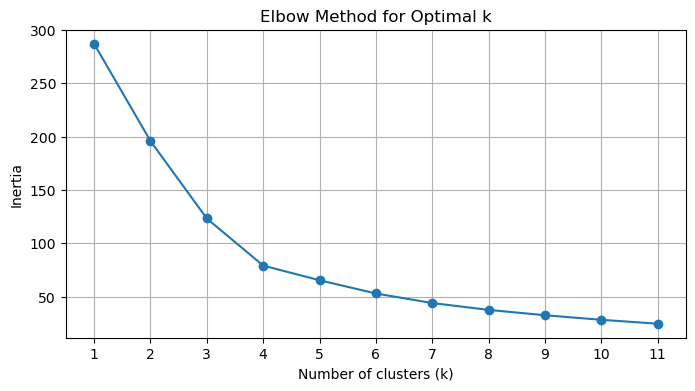

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(elbow_data['k'], elbow_data['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [11]:
best_k = 4

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [13]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [15]:
# Create a copy of the DataFrame
df_market_data_with_clusters = df_market_data_scaled.copy()


In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_with_clusters['cluster'] = predicted_clusters


# Display sample data
print(df_market_data_with_clusters.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter = df_market_data_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters'
)
scatter

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_features = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(pca_features, index=df_market_data_scaled.index, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance[0:3])
print(f"Total explained variance: {total_explained_variance}")

Total explained variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [21]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
pca_new_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_new_df['coin_id'] = df_market_data.index

# Set the coinid column as index
pca_new_df.set_index('coin_id', inplace=True)

# Display sample data
pca_new_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [23]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)
    

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data_pca = {
    'k': k_values,
    'inertia': inertia_pca
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_curve_data_pca)

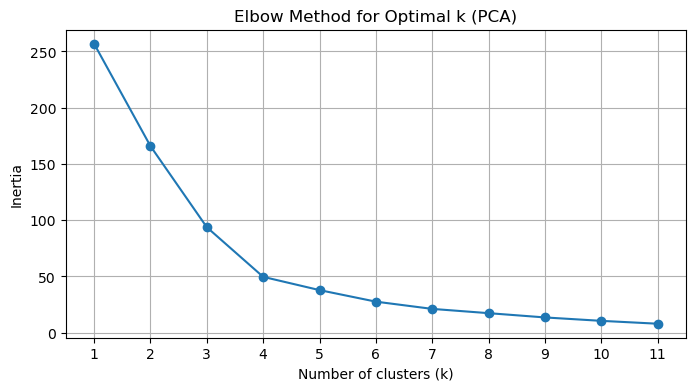

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_pca, marker='o')
plt.title('Elbow Method for Optimal k (PCA)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [26]:
# Answers first question
best_k_pca = 4
print(f"The best value for k when using the PCA data is: {best_k_pca}")

The best value for k when using the PCA data is: 4


In [27]:
# Answers second question
if best_k_pca != best_k:
    print("The best k value differs between the original and PCA data.")
else:
    print("The best k value is the same for both the original and PCA data.")

The best k value is the same for both the original and PCA data.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** They are the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)


In [29]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)


KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(predicted_clusters_pca)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [31]:
# Create a copy of the DataFrame with the PCA data
pca_df_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['cluster'] = predicted_clusters_pca

# Display sample data
print(pca_df_with_clusters.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        3
ripple       -0.471835 -0.222660 -0.479053        3
bitcoin-cash -1.157800  2.041209  1.859715        0


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_pca = pca_df_with_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA)'
)
scatter_pca

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

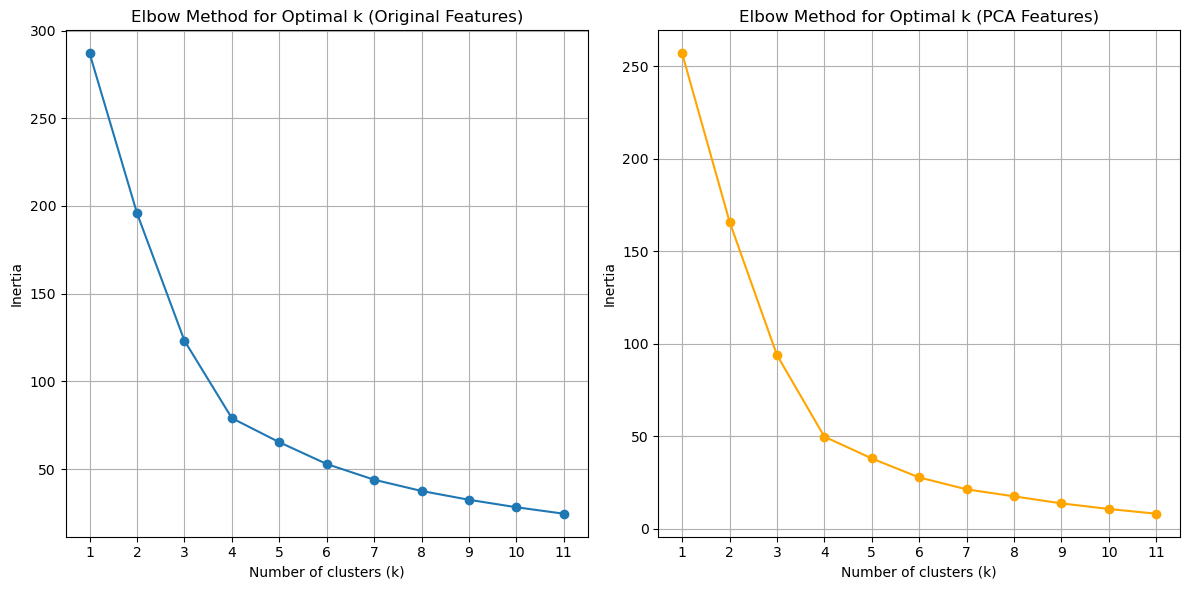

In [33]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Plot original features elbow curve
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', label='Original Features')
plt.title('Elbow Method for Optimal k (Original Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

# Plot PCA features elbow curve
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_pca, marker='o', color='orange', label='PCA Features')
plt.title('Elbow Method for Optimal k (PCA Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

In [34]:
# Composite plot to contrast the clusters
# YOUR CODE HERE! Why is this here?
original_df = df_market_data_scaled.copy()
original_df['cluster'] = predicted_clusters

pca_df_cluster = pd.DataFrame(pca_df, columns=['PC1', 'PC2'], index=df_market_data.index)
pca_df_cluster['cluster'] = predicted_clusters_pca

# Plot original features clusters
plot_original = original_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    title='Cryptocurrency Clusters (Original Features)',
    hover_cols=['coin_id']
)

# Plot PCA features clusters
plot_pca = pca_df_cluster.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    title='Cryptocurrency Clusters (PCA Features)',
    hover_cols=['coin_id']
)

# Combine plots
composite_plot_clusters = plot_original + plot_pca
composite_plot_clusters


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

# Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** For the elbow method, it's important to note that it often yields clearer results with a smaller y-range, making it easier to identify the "elbow" point where adding more clusters results in diminishing returns. In contrast, for the Cryptocurrency Cluster analysis, PCA (Principal Component Analysis) reveals a broader range of data. This wider y-range indicates that the data may have more variability and that values tend to be more positive. This could suggest that the underlying structure of the data is more complex, which might affect clustering outcomes.